# Import libraries

In [34]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt

path = "./img/download.png"


# Checkered Board

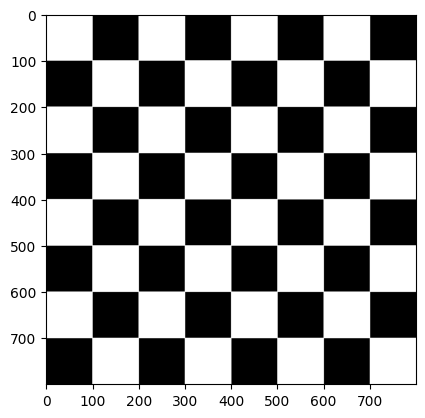

In [35]:
def create_chess_board(W, h, rows, cols):
    """
    Tạo ra một bảng cờ vua với kích thước W x h và số hàng, cột xác định.
    
    Tham số:
    W (int): Chiều rộng của hình ảnh.
    h (int): Chiều cao của hình ảnh.
    rows (int): Số hàng của bảng cờ vua.
    cols (int): Số cột của bảng cờ vua.
    
    Trả về:
    numpy.ndarray: Hình ảnh bảng cờ vua.
    """
    # Tạo một mảng 3 chiều với kích thước W x h x 3 với giá trị 0 (màu đen)
    img = np.zeros((W, h, 3), np.uint8)
    
    # Màu trắng cho các ô cờ
    color = (255, 255, 255)

    # Vẽ các ô cờ
    for i in range(rows):
        for j in range(cols):
            if (i + j) % 2 == 0:
                cv2.rectangle(img, (i * (W // rows), j * (h // cols)), 
                              ((i + 1) * (W // rows), (j + 1) * (h // cols)), color, -1)
    return img

# Hiển thị hình ảnh
plt.imshow(create_chess_board(800, 800, 8, 8))
plt.show()


# Color Corection

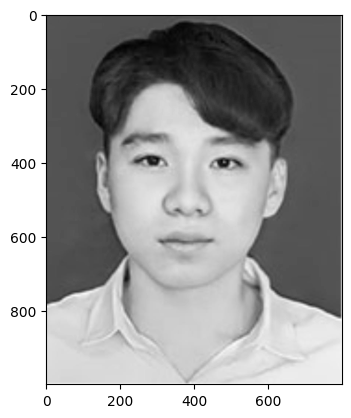

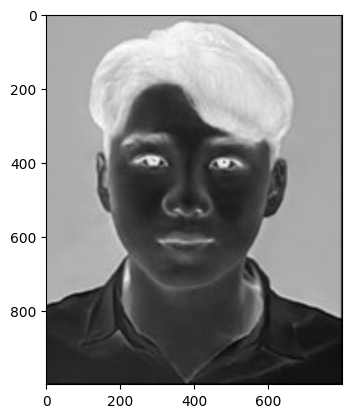

In [36]:
import cv2
import matplotlib.pyplot as plt

def grayscale_image(path):
    """Đọc hình ảnh grayscale từ đường dẫn và đảo ngược màu sắc."""
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    return img

def color_orection(img):
    """Đảo ngược màu sắc của hình ảnh."""
    return 255 - img
def display_image(img, cmap="gray"):
    plt.imshow(img, cmap=cmap)
    plt.show()

display_image(grayscale_image(path))
display_image(color_orection(grayscale_image(path)))


# Rotate image

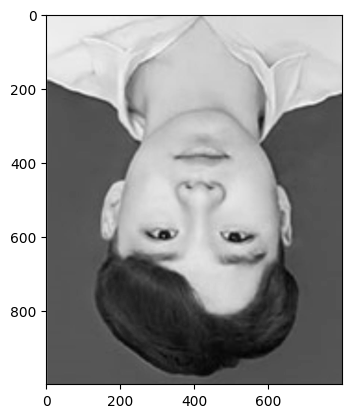

In [37]:
def rotate_image(image):
    """
    Xoay ngược hình ảnh 180 độ bằng vòng lặp for.
    
    Tham số:
    image (numpy.ndarray): Hình ảnh dưới dạng mảng numpy.
    
    Trả về:
    numpy.ndarray: Hình ảnh sau khi xoay ngược 180 độ.
    """

    # Lấy kích thước của hình ảnh
    h, w = image.shape[:2]

    # Tạo một mảng rỗng để lưu trữ hình ảnh đã xoay
    rotated = np.zeros_like(image)

    for i in range(h):
        for j in range(w):
            rotated[h - 1 - i, w - 1 - j] = image[i, j]

    return rotated

img = rotate_image(grayscale_image(path= path))
plt.imshow(img,cmap='gray')
plt.show()


# Color Separation

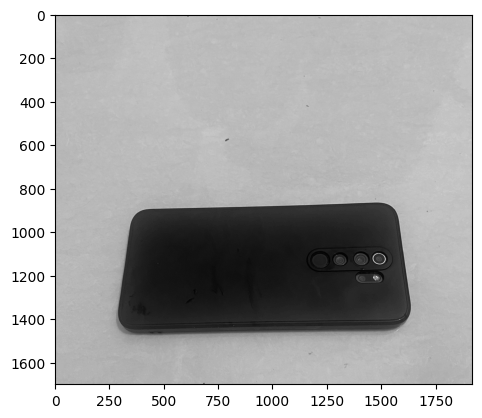

In [38]:
pathv2 = "./img/imagev2.jpg"
imgv2 = grayscale_image(path= pathv2)
plt.imshow(imgv2,cmap='gray')


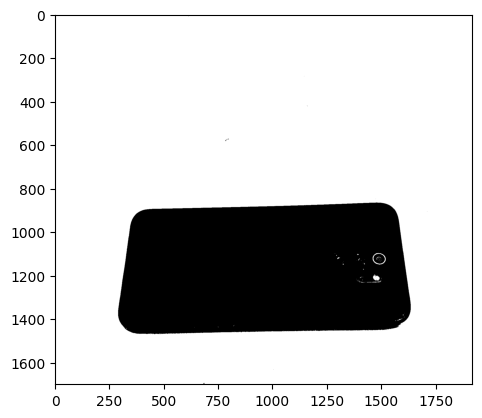

In [39]:
def separate_object(img, threshold_value=80):
    """
    Tách đối tượng từ hình ảnh đen trắng sử dụng phương pháp ngưỡng (threshold) với vòng lặp for.
    """    
    # Lấy kích thước của hình ảnh
    h, w = img.shape
    
    # Tạo một mảng rỗng để lưu trữ hình ảnh sau khi áp dụng ngưỡng
    thresholded_image = np.zeros((h, w), dtype=np.uint8)
    
    for i in range(h):
        for j in range(w):
            if img[i, j] > threshold_value:
                thresholded_image[i, j] = 255
            else:
                thresholded_image[i, j] = 0
    
    return img, thresholded_image

plt.imshow(separate_object(imgv2)[1], cmap='gray')
plt.show()


# Corner Line

0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
10 10
11 11
12 12
13 13
14 14
15 15
16 16
17 17
18 18
19 19
20 20
21 21
22 22
23 23
24 24
25 25
26 26
27 27
28 28
29 29
30 30
31 31
32 32
33 33
34 34
35 35
36 36
37 37
38 38
39 39
40 40
41 41
42 42
43 43
44 44
45 45
46 46
47 47
48 48
49 49
50 50
51 51
52 52
53 53
54 54
55 55
56 56
57 57
58 58
59 59
60 60
61 61
62 62
63 63
64 64
65 65
66 66
67 67
68 68
69 69
70 70
71 71
72 72
73 73
74 74
75 75
76 76
77 77
78 78
79 79
80 80
81 81
82 82
83 83
84 84
85 85
86 86
87 87
88 88
89 89
90 90
91 91
92 92
93 93
94 94
95 95
96 96
97 97
98 98
99 99
100 100
101 101
102 102
103 103
104 104
105 105
106 106
107 107
108 108
109 109
110 110
111 111
112 112
113 113
114 114
115 115
116 116
117 117
118 118
119 119
120 120
121 121
122 122
123 123
124 124
125 125
126 126
127 127
128 128
129 129
130 130
131 131
132 132
133 133
134 134
135 135
136 136
137 137
138 138
139 139
140 140
141 141
142 142
143 143
144 144
145 145
146 146
147 147
148 148
149 149
150 150
151 151
152 

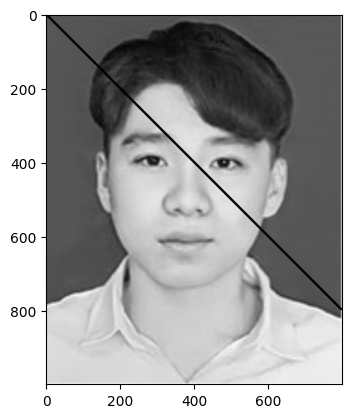

In [65]:
import numpy as np
import matplotlib.pyplot as plt

def draw_black_line(img, thickness=5):
    """
    Vẽ một đường thẳng màu đen cắt chéo góc trên bên trái của hình ảnh grayscale.
    
    Tham số:
    - img (numpy.ndarray): Hình ảnh grayscale đầu vào dưới dạng mảng numpy.
    - thickness (int): Độ dày của đường thẳng, mặc định là 5 pixel.

    """
    h, w = img.shape
    
    # Vẽ đường thẳng cắt chéo góc trên bên trái
    for i in range(thickness):
        for j in range(min(h, w)):
            if j + i < min(h, w):
                print(j + i, j)
                img[j + i, j] = 0  # Đặt giá trị pixel thành màu đen
                img[j, j + i] = 0  # Đặt giá trị pixel thành màu đen

    return img

img = grayscale_image(path=path)
img_with_line = draw_black_line(img)

plt.imshow(img_with_line, cmap='gray')
plt.show()


# Gradient

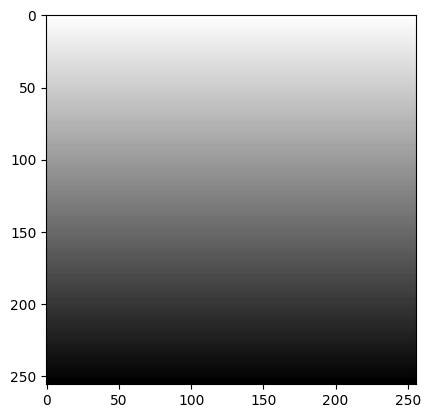

In [ ]:
def create_gradient_image(w, h):
    """
    Tạo một hình ảnh có gradient từ trắng đến đen sử dụng vòng lặp for.
    
    Tham số:
    - w (int): Chiều rộng của hình ảnh.
    - h (int): Chiều cao của hình ảnh.
    
    Trả về:
    - gradient_image (numpy.ndarray): Hình ảnh với gradient từ trắng đến đen.
    """
    # Tạo một mảng rỗng để lưu trữ hình ảnh gradient
    gradient_image = np.zeros((h, w), dtype=np.uint8)
    
    # Sử dụng vòng lặp for để tạo gradient
    for i in range(h):
        # Tính giá trị màu cho mỗi hàng (từ 255 đến 0)
        color_value = int(255 * (1 - i / (h - 1)))
        
        # Gán giá trị màu cho toàn bộ hàng
        gradient_image[i, :] = color_value
    
    return gradient_image

w, h = 256, 256
gradient_img = create_gradient_image(w, h)
plt.imshow(gradient_img, cmap='gray', vmin=0, vmax=255)
plt.show()
